## K-Means 분할적 군집화
---  
- 지정된 K만큼 임의의 중심점(Centroid)를 지정
- 중심점을 기준으로 가까운 거리에 있는 데이터를 하나의 군집으로 묶기
- 군집마다 다시 중심점 개산
- 중심점이 움직이지 않을 때까지 반복

#### [1] 데이터 로딩 및 준비

In [20]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [21]:
iris = load_iris()

In [22]:
irisData = iris.data
irisData.shape

(150, 4)

In [23]:
irisDataTwo = irisData[:,:2]
irisDataTwo.shape

(150, 2)

#### [2] 데이터 처리

In [24]:
num = 3

irisCluster=KMeans(n_clusters = num)

irisCluster.fit(irisDataTwo)

KMeans(n_clusters=3)

In [25]:
# Cluster 객체 속성 확인
print(f'cluster_centers_:   {irisCluster.cluster_centers_}')
print(f'labels_ :           {irisCluster.labels_}')

cluster_centers_:   [[5.006      3.428     ]
 [6.81276596 3.07446809]
 [5.77358491 2.69245283]]
labels_ :           [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


시각화

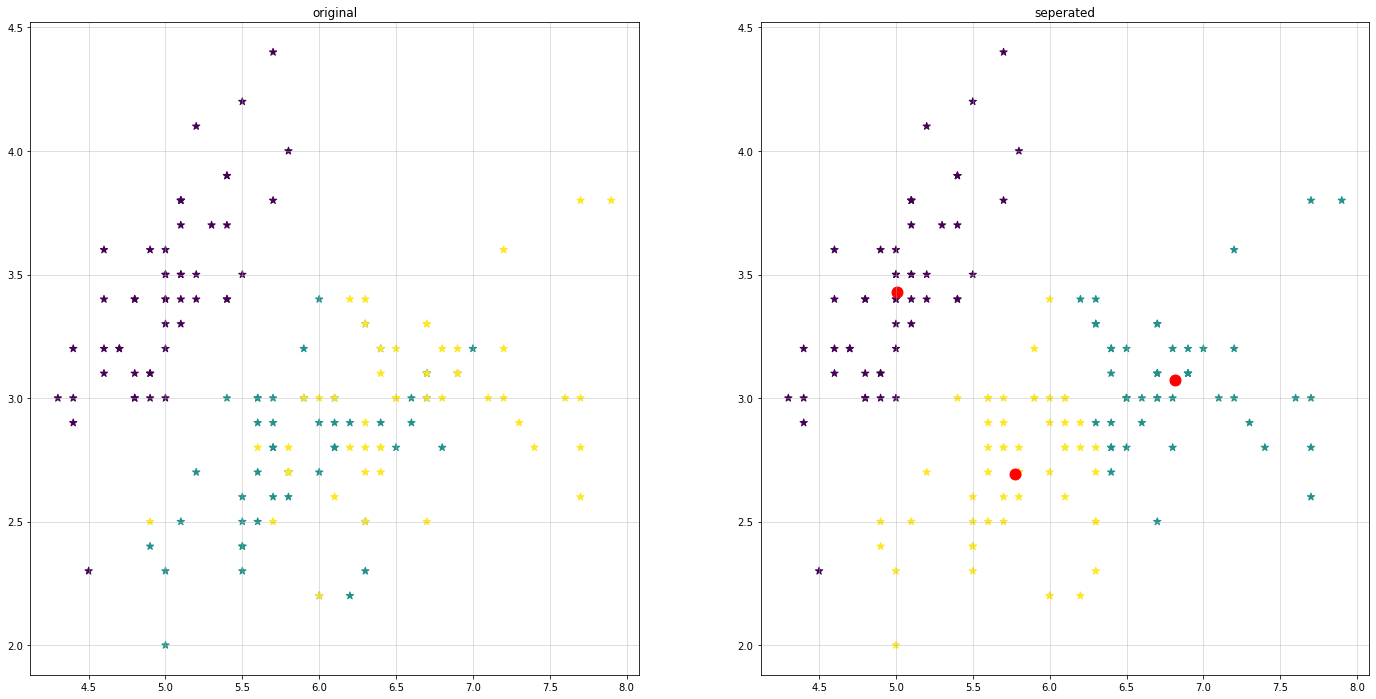

In [26]:
plt.figure(figsize = (24,12))

plt.subplot(1,2,1)
plt.scatter(iris.data[:,0], iris.data[:,1], c= iris.target, s = 60, marker='*')
plt.title('original')
plt.grid(True, alpha = 0.5)

plt.subplot(1,2,2)
plt.scatter(iris.data[:,0], iris.data[:,1], c= irisCluster.labels_, s = 60, marker='*')
for i in range(0, num) :
    plt.scatter(irisCluster.cluster_centers_[i][0], irisCluster.cluster_centers_[i][1], c= 'red', s = 120, marker='o')
plt.title('seperated')
plt.grid(True, alpha = 0.5)
plt.show()

### 최적 클러스트 수 찾기

c:\Users\LJH\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


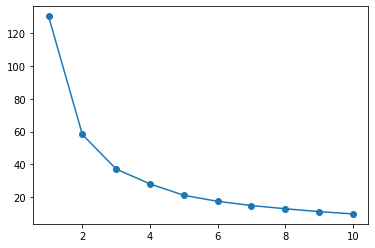

In [27]:
sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init = 'k-means++', random_state = 0)
    km.fit(irisDataTwo)
    sse.append(km.inertia_)

plt.plot(range(1,11), sse, marker ='o')    
plt.show()

## 군집화 이후 추가 작업
---  
- 라벨과 데이터를 가지고 지도학습 분류로 성능 체크